In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from cluster_tools import corr_plx, quality_filter, movprop_filter, quality2_filter, movprop_stat_filter

In [2]:
data = ascii.read("catalogue_ngc1027.csv")
data

RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM_1,pmRA,e_pmRA,pmDE,e_pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,e_RV,ELAT,RAJ2000,DEJ2000,phot_bp_rp_excess_factor_2a,phot_bp_rp_excess_factor_corr,Plx_corr
float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
41.102154,60.751884,464819605794855552,0.0559,0.0676,0.616,0.1034,2.402,-1.443,0.091,1.92,0.091,31,1.388,0.0,1.006,17.73438,18.559717,16.872322,1.687395,0.0,0.0,42.279453,41.102165,60.751877,1.2702895,-0.023056831,0.644894
40.93392,60.707798,464819915032423680,0.0771,0.0915,0.9722,0.1337,2.303,-1.492,0.13,1.755,0.127,31,1.332,0.0,1.032,18.265734,19.336851,17.237455,2.099396,0.0,0.0,42.272522,40.933933,60.70779,1.3556436,0.006881025,0.997428
41.971367,60.869427,464833766309733248,0.008,0.0088,0.8965,0.0135,2.625,-1.53,0.013,2.133,0.012,31,1.545,0.0,0.97,13.546622,13.889764,13.031779,0.857985,0.0,0.0,42.21656,41.971382,60.869415,1.2050198,0.00063459,0.9302309999999999
41.65688,60.831924,464835445634360960,0.0838,0.091,0.5969,0.1512,2.42,-1.698,0.137,1.724,0.119,31,1.331,0.0,0.971,18.286827,19.312056,17.303177,2.008879,0.0,0.0,42.243526,41.656895,60.831917,1.3236139,-0.012531909,0.621899
41.851685,60.892326,464836652527754368,0.0082,0.0091,0.9197,0.0136,2.608,-1.809,0.013,1.878,0.012,31,1.54,0.0,1.006,12.826741,13.18269,12.293089,0.889601,0.0,0.0,42.260834,41.8517,60.89232,1.2106379,0.0035945917,0.941174
41.83839,60.91178,464837408441994624,0.0172,0.0211,0.6646,0.0313,3.204,-2.082,0.028,2.435,0.028,31,1.403,0.0,0.971,15.608692,16.358255,14.755588,1.602668,0.0,0.0,42.281254,41.83841,60.911774,1.2871526,0.0044630626,0.698924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40.610764,62.316387,465994056012322816,0.1005,0.1224,0.7535,0.1611,3.276,-2.183,0.157,2.443,0.162,95,0.0,1.3367,0.998,18.705412,19.557,17.71741,1.83959,0.0,0.0,43.801617,40.610786,62.316376,1.3767202,0.06354248,0.7787569999999999
40.35213,62.384457,465997118335548672,0.0113,0.0147,0.96,0.0199,2.535,-1.906,0.019,1.672,0.021,95,0.0,1.5934,1.245,11.635002,11.86583,11.239923,0.625908,0.0,0.0,43.913765,40.35215,62.38445,1.1920058,0.004971739,0.9956229999999999


In [3]:
gmag = data["Gmag"]
bprp = data["BP-RP"]

In [4]:
#reading the table of isochrones
iso = ascii.read("isochrones.csv")

In [205]:
kk, = np.where(iso["logAge"] == 8.35)  #binaries
jj, = np.where(iso["logAge"] == 8.1)
ll, = np.where(iso["logAge"] == 7.95)  #turn

iso_sel1 = iso[kk]
iso_sel2 = iso[jj]
iso_sel3 = iso[ll]

In [ ]:
8.15

In [126]:
iso_sel2

Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,McoreTP,C_O,period0,period1,period2,period3,period4,pmode,Mloss,tau1m,X,Y,Xc,Xn,Xo,Cexcess,Z,mbolmag,Gmag,G_BPmag,G_RPmag
float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.01471,0.0,8.3,0.0900000036,1.0816895926,0.09,-2.983,3.3935,4.901,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-1.56e-16,0.0,0.7107,0.2745,0.002655,0.0007163,0.006496,-1.0,0.01476,12.228,14.27,17.093,12.789
0.01471,0.0,8.3,0.0940704867,1.1195749274,0.094,-2.947,3.3993,4.907,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-1.65e-16,0.0,0.7107,0.2745,0.002655,0.0007163,0.006496,-1.0,0.01476,12.137,14.179,17.004,12.699
0.01471,0.0,8.3,0.1000000015,1.1711064122,0.1,-2.894,3.408,4.915,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-1.79e-16,0.0,0.7107,0.2745,0.002655,0.0007163,0.006496,-1.0,0.01476,12.004,14.046,16.872,12.565
0.01471,0.0,8.3,0.1033823937,1.1987551428,0.103,-2.868,3.4118,4.919,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-1.86e-16,0.0,0.7107,0.2745,0.002655,0.0007163,0.006496,-1.0,0.01476,11.939,13.981,16.809,12.5
0.01471,0.0,8.3,0.1130501777,1.2717073587,0.113,-2.793,3.4231,4.928,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-2.09e-16,0.0,0.7107,0.2745,0.002655,0.0007163,0.006496,-1.0,0.01476,11.752,13.71,16.427,12.248
0.01471,0.0,8.3,0.1200000048,1.3193154741,0.12,-2.739,3.4316,4.935,0,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-2.28e-16,0.0,0.7107,0.2745,0.002655,0.0007163,0.006496,-1.0,0.01476,11.618,13.453,16.009,12.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.01471,0.0,8.3,4.0461215973,2.6077719749,2.406,4.256,3.4533,-0.671,8,0.818,0.607,602.95,-1.0,-1.0,-1.0,-1.0,1,-1.97e-05,0.98,0.6451,0.3391,0.002496,0.002842,0.005482,-1.0,0.01579,-5.869,-1.067,3.055,-2.817
0.01471,0.0,8.3,4.0461306572,2.607772051,2.363,4.286,3.4471,-0.734,8,0.819,0.607,597.44,-1.0,-1.0,-1.0,-1.0,1,-2.89e-05,1.55,0.6451,0.3391,0.002495,0.002842,0.005482,-1.0,0.01579,-5.945,-0.19,4.506,-2.053


In [84]:
#print(iso_sel1["Gmag"] - DY)

In [1]:
kk, = np.where(iso["logAge"] == 8.35)  #binaries
jj, = np.where(iso["logAge"] == 8.1)
ll, = np.where(iso["logAge"] == 7.95)  #turn

iso_sel1 = iso[kk]
iso_sel2 = iso[jj]
iso_sel3 = iso[ll]

NameError: name 'np' is not defined

In [182]:
EBV = 0.36
AV = 3.1 * EBV

# Calcular magnitude absoluta corrigida M_d
Md = 10.2

DY = Md + 0.8363*AV
DX = (1.083-0.634)*AV

Text(0.5, 0, '$G_{BP}-G_{RP}$ (mag)')

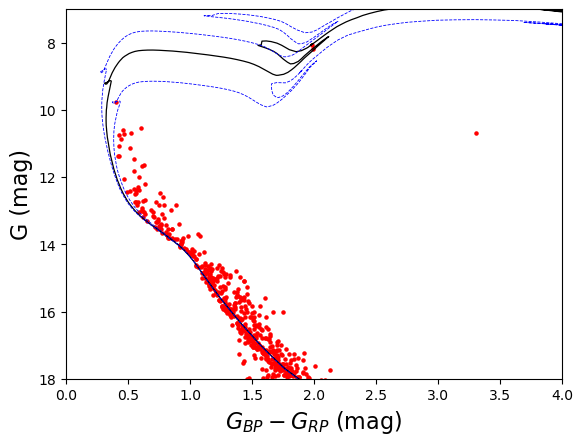

In [207]:
fig, ax = plt.subplots()
ax.scatter(bprp,gmag,color = 'red', s=5)
ax.plot((iso_sel1['G_BPmag']-iso_sel1['G_RPmag']) + DX, iso_sel1["Gmag"] + DY, color='b',linestyle='--',linewidth=0.6)
ax.plot((iso_sel2['G_BPmag']-iso_sel2['G_RPmag']) + DX, iso_sel2["Gmag"] + DY, color='k',linewidth=0.9)
ax.plot((iso_sel3['G_BPmag']-iso_sel3['G_RPmag']) + DX, iso_sel3["Gmag"] + DY, color='b',linestyle='--',linewidth=0.6)

ax.set_xlim(0, 4.0)
ax.set_ylim(18, 7)
ax.set_ylabel(r"G (mag)",fontsize=16)
ax.set_xlabel(r"$G_{BP}-G_{RP}$ (mag)",fontsize=16)